In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [8]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=10).fit(X_train, y_train)

In [9]:
rf_model.n_estimators

10

In [11]:
rf_model.predict(X_test)[0:5]

array([ 748.9   , 1070.75  , 1583.    ,  147.4167,  677.    ])

In [12]:
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

375.1219133864713

In [14]:
rf_params = {"max_depth": list(range(1, 10)),
             "max_features":[2,3,5,7,9,10,15],
             "n_estimators": [100, 200, 500, 1000, 2000]}

In [15]:
rf_model = RandomForestRegressor(random_state=42)

In [16]:
from sklearn.model_selection import GridSearchCV


rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1)

In [17]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [2, 3, 5, 7, 9, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [18]:
rf_tuned = RandomForestRegressor(random_state=42,
                                 max_depth=rf_cv_model.best_params_['max_depth'],
                                 max_features=rf_cv_model.best_params_['max_features'],
                                 n_estimators=rf_cv_model.best_params_['n_estimators']).fit(X_train, y_train)

In [19]:
y_pred_tuned = rf_tuned.predict(X_test)

In [20]:
np.sqrt(mean_squared_error(y_test, y_pred_tuned))

346.655412352411

Text(0.5, 0, 'Variable Importance')

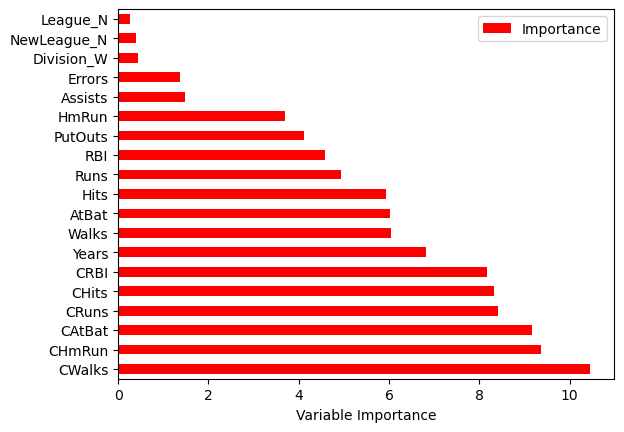

In [21]:
importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_*100},
                           index=X_train.columns)
importance.sort_values(by='Importance', ascending=False,
                       axis = 0).plot(kind='barh', color = "r")

plt.xlabel('Variable Importance')